In [1]:
from scipy.stats import kruskal
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [2]:
folder_path = '/Users/alina/Documents/PhD/AFM/simulation_data' # /Users/alina/Desktop/AFM/simulation_data
file_str = 'gSentiment.csv'

gSentiment = pd.read_csv(os.path.join(folder_path, file_str))

In [3]:
gSentiment

,BehaviorSpace results (NetLogo 6.2.0),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Goncalves.nlogo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gSentiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/04/2024 08:37:13:742 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,min-pxcor,max-pxcor,min-pycor,max-pycor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-50,50,-50,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,NaN,0.149691207,0.149691207,-0.146554259,0.146554259,0.23830997,0.23830997,-0.008332516,0.008332516,0.436917949,0.436917949,0.299676502,0.299676502,-0.413194785,0.413194785,-0.03480051,0.03480051,-0.327124792,0.327124792
766,NaN,0.212430154,0.212430154,-0.019507891,0.019507891,0.300852858,0.300852858,0.196745417,0.196745417,-0.188118812,0.188118812,-0.098911871,0.098911871,0.22321341,0.22321341,-0.283207529,0.283207529,-0.194588766,0.194588766
767,NaN,0.071463582,0.071463582,0.096951279,0.096951279,0.258308009,0.258308009,0.370061759,0.370061759,-0.383981963,0.383981963,0.09675522,0.09675522,-0.098715812,0.098715812,-0.086364082,0.086364082,0.191451818,0.191451818
768,NaN,-0.078521714,0.078521714,-0.018723655,0.018723655,0.108126654,0.108126654,0.548671699,0.548671699,-0.350455838,0.350455838,-0.093814332,0.093814332,0.23321243,0.23321243,0.26046466,0.26046466,0.475737673,0.475737673


In [4]:
#gSentiment.iloc[[7,10]+list(range(18,770))]
gSentiment_data = gSentiment.iloc[[7,10]+list(range(18,770))]
initial_cols = gSentiment.iloc[18, :].to_list()
gSentiment_data.columns = initial_cols
gSentiment_data

,all run data,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator
7,max-news-sensitivity,0.2,0.2,0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.6,0.6
10,max-base-propensity-to-sentiment-contagion,0.25,0.25,0.5,0.5,0.75,0.75,0.25,0.25,0.5,0.5,0.75,0.75,0.25,0.25,0.5,0.5,0.75,0.75
18,all run data,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator,returns,volatility-indicator
19,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,NaN,-0.093226154,0.093226154,0.126164102,0.126164102,0.100872463,0.100872463,-0.196941476,0.196941476,-0.238702088,0.238702088,-0.241446917,0.241446917,0.258896187,0.258896187,-0.343005588,0.343005588,-0.312420351,0.312420351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,NaN,0.149691207,0.149691207,-0.146554259,0.146554259,0.23830997,0.23830997,-0.008332516,0.008332516,0.436917949,0.436917949,0.299676502,0.299676502,-0.413194785,0.413194785,-0.03480051,0.03480051,-0.327124792,0.327124792
766,NaN,0.212430154,0.212430154,-0.019507891,0.019507891,0.300852858,0.300852858,0.196745417,0.196745417,-0.188118812,0.188118812,-0.098911871,0.098911871,0.22321341,0.22321341,-0.283207529,0.283207529,-0.194588766,0.194588766
767,NaN,0.071463582,0.071463582,0.096951279,0.096951279,0.258308009,0.258308009,0.370061759,0.370061759,-0.383981963,0.383981963,0.09675522,0.09675522,-0.098715812,0.098715812,-0.086364082,0.086364082,0.191451818,0.191451818
768,NaN,-0.078521714,0.078521714,-0.018723655,0.018723655,0.108126654,0.108126654,0.548671699,0.548671699,-0.350455838,0.350455838,-0.093814332,0.093814332,0.23321243,0.23321243,0.26046466,0.26046466,0.475737673,0.475737673


In [5]:
gReturns = gSentiment_data.loc[:,[f for f in initial_cols if f == 'returns']].reset_index(drop=True)
gReturns

,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns,...,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns
0,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,...,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6
1,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,...,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75
2,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns,...,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.093226154,0.126164102,0.100872463,-0.196941476,-0.238702088,-0.241446917,0.258896187,-0.343005588,-0.312420351,-0.093226154,...,-0.312420351,-0.093226154,0.126164102,0.100872463,-0.196941476,-0.238702088,-0.241446917,0.258896187,-0.343005588,-0.312420351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.149691207,-0.146554259,0.23830997,-0.008332516,0.436917949,0.299676502,-0.413194785,-0.03480051,-0.327124792,0.149691207,...,-0.327124792,0.149691207,-0.146554259,0.23830997,-0.008332516,0.436917949,0.299676502,-0.413194785,-0.03480051,-0.327124792
750,0.212430154,-0.019507891,0.300852858,0.196745417,-0.188118812,-0.098911871,0.22321341,-0.283207529,-0.194588766,0.212430154,...,-0.194588766,0.212430154,-0.019507891,0.300852858,0.196745417,-0.188118812,-0.098911871,0.22321341,-0.283207529,-0.194588766
751,0.071463582,0.096951279,0.258308009,0.370061759,-0.383981963,0.09675522,-0.098715812,-0.086364082,0.191451818,0.071463582,...,0.191451818,0.071463582,0.096951279,0.258308009,0.370061759,-0.383981963,0.09675522,-0.098715812,-0.086364082,0.191451818
752,-0.078521714,-0.018723655,0.108126654,0.548671699,-0.350455838,-0.093814332,0.23321243,0.26046466,0.475737673,-0.078521714,...,0.475737673,-0.078521714,-0.018723655,0.108126654,0.548671699,-0.350455838,-0.093814332,0.23321243,0.26046466,0.475737673


In [6]:
gVolatility = gSentiment_data.loc[:,[f for f in initial_cols if f == 'volatility-indicator']].reset_index(drop=True)
gVolatility

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,...,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
0,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,...,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6
1,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,...,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75
2,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,...,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.093226154,0.126164102,0.100872463,0.196941476,0.238702088,0.241446917,0.258896187,0.343005588,0.312420351,0.093226154,...,0.312420351,0.093226154,0.126164102,0.100872463,0.196941476,0.238702088,0.241446917,0.258896187,0.343005588,0.312420351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.149691207,0.146554259,0.23830997,0.008332516,0.436917949,0.299676502,0.413194785,0.03480051,0.327124792,0.149691207,...,0.327124792,0.149691207,0.146554259,0.23830997,0.008332516,0.436917949,0.299676502,0.413194785,0.03480051,0.327124792
750,0.212430154,0.019507891,0.300852858,0.196745417,0.188118812,0.098911871,0.22321341,0.283207529,0.194588766,0.212430154,...,0.194588766,0.212430154,0.019507891,0.300852858,0.196745417,0.188118812,0.098911871,0.22321341,0.283207529,0.194588766
751,0.071463582,0.096951279,0.258308009,0.370061759,0.383981963,0.09675522,0.098715812,0.086364082,0.191451818,0.071463582,...,0.191451818,0.071463582,0.096951279,0.258308009,0.370061759,0.383981963,0.09675522,0.098715812,0.086364082,0.191451818
752,0.078521714,0.018723655,0.108126654,0.548671699,0.350455838,0.093814332,0.23321243,0.26046466,0.475737673,0.078521714,...,0.475737673,0.078521714,0.018723655,0.108126654,0.548671699,0.350455838,0.093814332,0.23321243,0.26046466,0.475737673


In [7]:
# max-news-sensitivity = .2 and max-base-propensity = .25 .5 .75
gret_02_025 = gReturns.iloc[3:,0].astype(float)
gret_02_05 = gReturns.iloc[3:,1].astype(float)
gret_02_075 = gReturns.iloc[3:,2].astype(float)

In [8]:
# Sample data representing returns for different categories of max-news-sensitivity
# Perform Kruskal-Wallis test across the three groups
kruskal_stat, p_value = kruskal(gret_02_025, gret_02_05, gret_02_075)

kruskal_stat, p_value


(np.float64(7.566275225677266), np.float64(0.02275119487836156))

In [11]:
# Perform pairwise Mann-Whitney U tests
p_values = []
p_values.append(mannwhitneyu(gret_02_025, gret_02_05).pvalue)
p_values.append(mannwhitneyu(gret_02_025, gret_02_075).pvalue)
p_values.append(mannwhitneyu(gret_02_05, gret_02_075).pvalue)

# Apply Bonferroni correction
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

# Print corrected p-values
print("AFM p-values:", corrected_p_values)

AFM p-values: [0.02862398 1.         0.09599703]


In [12]:
gVolatility.iloc[3:,0].astype(float)

3      0.000000
4      0.093226
5      0.154593
6      0.206352
7      0.231840
         ...   
749    0.149691
750    0.212430
751    0.071464
752    0.078522
753    0.124596
Name: volatility-indicator, Length: 751, dtype: float64

In [13]:
gvol_02_025 = gVolatility.iloc[3:,0].astype(float)
gvol_02_05 = gVolatility.iloc[3:,1].astype(float)
gvol_02_075 = gVolatility.iloc[3:,2].astype(float)

In [14]:
# Perform Kruskal-Wallis test across the three groups
vkruskal_stat, vp_value = kruskal(gvol_02_025, gvol_02_05, gvol_02_075)

vkruskal_stat, vp_value

(np.float64(43.77632514119387), np.float64(3.11954874810493e-10))

In [16]:
# Perform pairwise Mann-Whitney U tests
vp_values = []
vp_values.append(mannwhitneyu(gvol_02_025, gvol_02_05).pvalue)
vp_values.append(mannwhitneyu(gvol_02_025, gvol_02_075).pvalue)
vp_values.append(mannwhitneyu(gvol_02_05, gvol_02_075).pvalue)

# Apply Bonferroni correction
vcorrected_p_values = multipletests(vp_values, method='bonferroni')[1]

# Print corrected p-values
print("AFM Volatility Corrected p-values:", vcorrected_p_values)

AFM Volatility Corrected p-values: [5.50838974e-08 1.79846303e-08 1.00000000e+00]


### ETF 

In [17]:
file_str2 = 'eSentiment.csv'

eSentiment = pd.read_csv(os.path.join(folder_path, file_str2))

In [18]:
eSentiment

,BehaviorSpace results (NetLogo 6.2.0),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,ABM_ETF.nlogo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,eSentiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/03/2024 19:00:10:424 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,min-pxcor,max-pxcor,min-pycor,max-pycor,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-50,50,-50,50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,747,0.102440937,0.102440937,129977,303854,0.065385746,0.065385746,67793,260075,-0.051465543,...,233796,475147,0.302029213,0.302029213,-40563,104131,0.459464758,0.459464758,-369078,-15172
768,748,-0.095186746,0.095186746,129165,304698,0.074992648,0.074992648,68769,260979,-0.127536516,...,232141,476516,-0.06695422,0.06695422,-41231,104317,0.364572101,0.364572101,-365223,-14992
769,749,-0.126360161,0.126360161,128147,305589,-0.072247819,0.072247819,68180,261867,0.047348299,...,229355,477976,0.273796687,0.273796687,-38378,104563,0.221448878,0.221448878,-362981,-14878
770,750,-0.106166062,0.106166062,127302,306476,0.054210372,0.054210372,68831,262724,-0.088520733,...,226247,479297,0.410253897,0.410253897,-34250,104782,0.477698265,0.477698265,-358238,-14810


In [19]:
eSentiment.iloc[[7,9]+list(range(20,772))]

,BehaviorSpace results (NetLogo 6.2.0),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
7,max-news-sensitivity,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
9,max-base-propensity-to-sentiment-contagion,0.25,0.25,0.25,0.25,0.5,0.5,0.5,0.5,0.75,...,0.25,0.25,0.5,0.5,0.5,0.5,0.75,0.75,0.75,0.75
20,time,returns,volatility-indicator,total-shares,total-etf-shares,returns,volatility-indicator,total-shares,total-etf-shares,returns,...,total-shares,total-etf-shares,returns,volatility-indicator,total-shares,total-etf-shares,returns,volatility-indicator,total-shares,total-etf-shares
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,2,0.089501029,0.089501029,11114,0,0.131849819,0.131849819,11546,0,-0.150083325,...,13052,0,-0.33261445,0.33261445,6808,0,0.326340555,0.326340555,13530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,747,0.102440937,0.102440937,129977,303854,0.065385746,0.065385746,67793,260075,-0.051465543,...,233796,475147,0.302029213,0.302029213,-40563,104131,0.459464758,0.459464758,-369078,-15172
768,748,-0.095186746,0.095186746,129165,304698,0.074992648,0.074992648,68769,260979,-0.127536516,...,232141,476516,-0.06695422,0.06695422,-41231,104317,0.364572101,0.364572101,-365223,-14992
769,749,-0.126360161,0.126360161,128147,305589,-0.072247819,0.072247819,68180,261867,0.047348299,...,229355,477976,0.273796687,0.273796687,-38378,104563,0.221448878,0.221448878,-362981,-14878
770,750,-0.106166062,0.106166062,127302,306476,0.054210372,0.054210372,68831,262724,-0.088520733,...,226247,479297,0.410253897,0.410253897,-34250,104782,0.477698265,0.477698265,-358238,-14810


In [20]:
eSentiment_data = eSentiment.iloc[[7,9]+list(range(20,772))]
initial_cols = eSentiment.iloc[20, :].to_list()
eSentiment_data.columns = initial_cols


In [21]:
eSentiment.iloc[20:,:]

,BehaviorSpace results (NetLogo 6.2.0),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
20,time,returns,volatility-indicator,total-shares,total-etf-shares,returns,volatility-indicator,total-shares,total-etf-shares,returns,...,total-shares,total-etf-shares,returns,volatility-indicator,total-shares,total-etf-shares,returns,volatility-indicator,total-shares,total-etf-shares
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,2,0.089501029,0.089501029,11114,0,0.131849819,0.131849819,11546,0,-0.150083325,...,13052,0,-0.33261445,0.33261445,6808,0,0.326340555,0.326340555,13530,0
23,3,-0.036565043,0.036565043,10741,0,0.203215371,0.203215371,13619,0,-0.253602588,...,13025,0,-0.184589746,0.184589746,4925,0,0.61043035,0.61043035,19757,0
24,4,-0.112636016,0.112636016,9592,0,0.291834134,0.291834134,16596,0,-0.364572101,...,10320,0,0.234584845,0.234584845,7318,0,0.65768062,0.65768062,26466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,747,0.102440937,0.102440937,129977,303854,0.065385746,0.065385746,67793,260075,-0.051465543,...,233796,475147,0.302029213,0.302029213,-40563,104131,0.459464758,0.459464758,-369078,-15172
768,748,-0.095186746,0.095186746,129165,304698,0.074992648,0.074992648,68769,260979,-0.127536516,...,232141,476516,-0.06695422,0.06695422,-41231,104317,0.364572101,0.364572101,-365223,-14992
769,749,-0.126360161,0.126360161,128147,305589,-0.072247819,0.072247819,68180,261867,0.047348299,...,229355,477976,0.273796687,0.273796687,-38378,104563,0.221448878,0.221448878,-362981,-14878
770,750,-0.106166062,0.106166062,127302,306476,0.054210372,0.054210372,68831,262724,-0.088520733,...,226247,479297,0.410253897,0.410253897,-34250,104782,0.477698265,0.477698265,-358238,-14810


In [22]:
eReturns = eSentiment_data.loc[:,[f for f in initial_cols if f == 'returns']].reset_index(drop=True)
eReturns

,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns,...,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns
0,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,...,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6
1,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,...,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75
2,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns,...,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.089501029,0.131849819,-0.150083325,0.1910597,0.225370062,0.243603568,0.279482404,-0.33261445,0.326340555,0.089501029,...,0.326340555,0.089501029,0.131849819,-0.150083325,0.1910597,0.225370062,0.243603568,0.279482404,-0.33261445,0.326340555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.102440937,0.065385746,-0.051465543,-0.247720812,-0.167728654,-0.354573081,0.38966768,0.302029213,0.459464758,0.102440937,...,0.459464758,0.102440937,0.065385746,-0.051465543,-0.247720812,-0.167728654,-0.354573081,0.38966768,0.302029213,0.459464758
750,-0.095186746,0.074992648,-0.127536516,0.099696108,-0.214586805,-0.399078522,-0.181648858,-0.06695422,0.364572101,-0.095186746,...,0.364572101,-0.095186746,0.074992648,-0.127536516,0.099696108,-0.214586805,-0.399078522,-0.181648858,-0.06695422,0.364572101
751,-0.126360161,-0.072247819,0.047348299,0.196941476,0.157533575,-0.1910597,-0.315949417,0.273796687,0.221448878,-0.126360161,...,0.221448878,-0.126360161,-0.072247819,0.047348299,0.196941476,0.157533575,-0.1910597,-0.315949417,0.273796687,0.221448878
752,-0.106166062,0.054210372,-0.088520733,0.255955299,-0.18851093,-0.234388785,-0.325556318,0.410253897,0.477698265,-0.106166062,...,0.477698265,-0.106166062,0.054210372,-0.088520733,0.255955299,-0.18851093,-0.234388785,-0.325556318,0.410253897,0.477698265


In [23]:
eVolatility = eSentiment_data.loc[:,[f for f in initial_cols if f == 'volatility-indicator']].reset_index(drop=True)
eVolatility

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,...,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
0,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,...,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6
1,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,...,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75
2,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,...,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.089501029,0.131849819,0.150083325,0.1910597,0.225370062,0.243603568,0.279482404,0.33261445,0.326340555,0.089501029,...,0.326340555,0.089501029,0.131849819,0.150083325,0.1910597,0.225370062,0.243603568,0.279482404,0.33261445,0.326340555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.102440937,0.065385746,0.051465543,0.247720812,0.167728654,0.354573081,0.38966768,0.302029213,0.459464758,0.102440937,...,0.459464758,0.102440937,0.065385746,0.051465543,0.247720812,0.167728654,0.354573081,0.38966768,0.302029213,0.459464758
750,0.095186746,0.074992648,0.127536516,0.099696108,0.214586805,0.399078522,0.181648858,0.06695422,0.364572101,0.095186746,...,0.364572101,0.095186746,0.074992648,0.127536516,0.099696108,0.214586805,0.399078522,0.181648858,0.06695422,0.364572101
751,0.126360161,0.072247819,0.047348299,0.196941476,0.157533575,0.1910597,0.315949417,0.273796687,0.221448878,0.126360161,...,0.221448878,0.126360161,0.072247819,0.047348299,0.196941476,0.157533575,0.1910597,0.315949417,0.273796687,0.221448878
752,0.106166062,0.054210372,0.088520733,0.255955299,0.18851093,0.234388785,0.325556318,0.410253897,0.477698265,0.106166062,...,0.477698265,0.106166062,0.054210372,0.088520733,0.255955299,0.18851093,0.234388785,0.325556318,0.410253897,0.477698265


In [24]:
eReturns.iloc[3:,0].astype(float)

3      0.000000
4      0.089501
5     -0.036565
6     -0.112636
7      0.035389
         ...   
749    0.102441
750   -0.095187
751   -0.126360
752   -0.106166
753   -0.118518
Name: returns, Length: 751, dtype: float64

In [25]:
# max-news-sensitivity = .2 and max-base-propensity = .25 .5 .75
eret_02_025 = eReturns.iloc[3:,0].astype(float)
eret_02_05 = eReturns.iloc[3:,1].astype(float)
eret_02_075 = eReturns.iloc[3:,2].astype(float)

In [26]:
# Perform Kruskal-Wallis test across the three groups
ekruskal_stat, ep_value = kruskal(eret_02_025, eret_02_05, eret_02_075)
print('kruskal-Wallis test:')
ekruskal_stat, ep_value

kruskal-Wallis test:


(np.float64(19.474849328693544), np.float64(5.903236740813165e-05))

In [27]:
# Perform pairwise Mann-Whitney U tests
ep_values = []
ep_values.append(mannwhitneyu(eret_02_025, eret_02_05).pvalue)
ep_values.append(mannwhitneyu(eret_02_025, eret_02_075).pvalue)
ep_values.append(mannwhitneyu(eret_02_05, eret_02_075).pvalue)

# Apply Bonferroni correction
ecorrected_p_values = multipletests(ep_values, method='bonferroni')[1]

# Print corrected p-values
print("ETF Returns Corrected p-values:", ecorrected_p_values)

ETF Returns Corrected p-values: [1.00000000e+00 5.62673563e-05 4.45254694e-03]


In [28]:
eVolatility

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,...,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
0,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,...,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6
1,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,...,0.75,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75
2,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,...,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.089501029,0.131849819,0.150083325,0.1910597,0.225370062,0.243603568,0.279482404,0.33261445,0.326340555,0.089501029,...,0.326340555,0.089501029,0.131849819,0.150083325,0.1910597,0.225370062,0.243603568,0.279482404,0.33261445,0.326340555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.102440937,0.065385746,0.051465543,0.247720812,0.167728654,0.354573081,0.38966768,0.302029213,0.459464758,0.102440937,...,0.459464758,0.102440937,0.065385746,0.051465543,0.247720812,0.167728654,0.354573081,0.38966768,0.302029213,0.459464758
750,0.095186746,0.074992648,0.127536516,0.099696108,0.214586805,0.399078522,0.181648858,0.06695422,0.364572101,0.095186746,...,0.364572101,0.095186746,0.074992648,0.127536516,0.099696108,0.214586805,0.399078522,0.181648858,0.06695422,0.364572101
751,0.126360161,0.072247819,0.047348299,0.196941476,0.157533575,0.1910597,0.315949417,0.273796687,0.221448878,0.126360161,...,0.221448878,0.126360161,0.072247819,0.047348299,0.196941476,0.157533575,0.1910597,0.315949417,0.273796687,0.221448878
752,0.106166062,0.054210372,0.088520733,0.255955299,0.18851093,0.234388785,0.325556318,0.410253897,0.477698265,0.106166062,...,0.477698265,0.106166062,0.054210372,0.088520733,0.255955299,0.18851093,0.234388785,0.325556318,0.410253897,0.477698265


In [29]:
eVolatility.iloc[3:,0].astype(float)

3      0.000000
4      0.089501
5      0.036565
6      0.112636
7      0.035389
         ...   
749    0.102441
750    0.095187
751    0.126360
752    0.106166
753    0.118518
Name: volatility-indicator, Length: 751, dtype: float64

In [30]:
# max-news-sensitivity = .2 and max-base-propensity = .25 .5 .75
evol_02_025 = eVolatility.iloc[3:,0].astype(float)
evol_02_05 = eVolatility.iloc[3:,1].astype(float)
evol_02_075 = eVolatility.iloc[3:,2].astype(float)

In [31]:
evkruskal_stat, evp_value = kruskal(evol_02_025, evol_02_05, evol_02_075)

evkruskal_stat, evp_value

(np.float64(0.33549854835783055), np.float64(0.8455658132921119))

In [32]:
# Perform pairwise Mann-Whitney U tests
evp_values = []
evp_values.append(mannwhitneyu(evol_02_025, evol_02_05).pvalue)
evp_values.append(mannwhitneyu(evol_02_025, evol_02_075).pvalue)
evp_values.append(mannwhitneyu(evol_02_05, evol_02_075).pvalue)

# Apply Bonferroni correction
evcorrected_p_values = multipletests(evp_values, method='bonferroni')[1]

# Print corrected p-values
print("ETF Volatility Corrected p-values:", evcorrected_p_values)

ETF Volatility Corrected p-values: [1. 1. 1.]


### Graph Comparison

In [58]:
comparison1_02_0245 = pd.concat([gvol_02_025, evol_02_025], axis=1).reset_index(drop=True)
comparison1_02_0245.columns = ['AFM', 'ETF']
comparison1_02_0245

,AFM,ETF
0,0.000000,0.000000
1,0.093226,0.089501
2,0.154593,0.036565
3,0.206352,0.112636
4,0.231840,0.035389
...,...,...
746,0.149691,0.102441
747,0.212430,0.095187
748,0.071464,0.126360
749,0.078522,0.106166


In [59]:
# Resetting index to include it as a variable in the melted DataFrame
comparison1_02_0245.reset_index(inplace=True)

# Melting the DataFrame to prepare for a violin plot
melted_df = comparison1_02_0245.melt(id_vars=['index'], var_name='Group', value_name='Value')

# Displaying the melted DataFrame
melted_df

,index,Group,Value
0,0,AFM,0.000000
1,1,AFM,0.093226
2,2,AFM,0.154593
3,3,AFM,0.206352
4,4,AFM,0.231840
...,...,...,...
1497,746,ETF,0.102441
1498,747,ETF,0.095187
1499,748,ETF,0.126360
1500,749,ETF,0.106166


In [60]:

melted_df['class'] = melted_df['Group'].apply(lambda x: 1 if x == 'ETF' else 0)


In [56]:
#melted_df['Group'] = melted_df.Group.apply(lambda x: 'AFM' if x == 'goncalves' else 'ETF')

In [61]:
melted_df

,index,Group,Value,class
0,0,AFM,0.000000,0
1,1,AFM,0.093226,0
2,2,AFM,0.154593,0
3,3,AFM,0.206352,0
4,4,AFM,0.231840,0
...,...,...,...,...
1497,746,ETF,0.102441,1
1498,747,ETF,0.095187,1
1499,748,ETF,0.126360,1
1500,749,ETF,0.106166,1


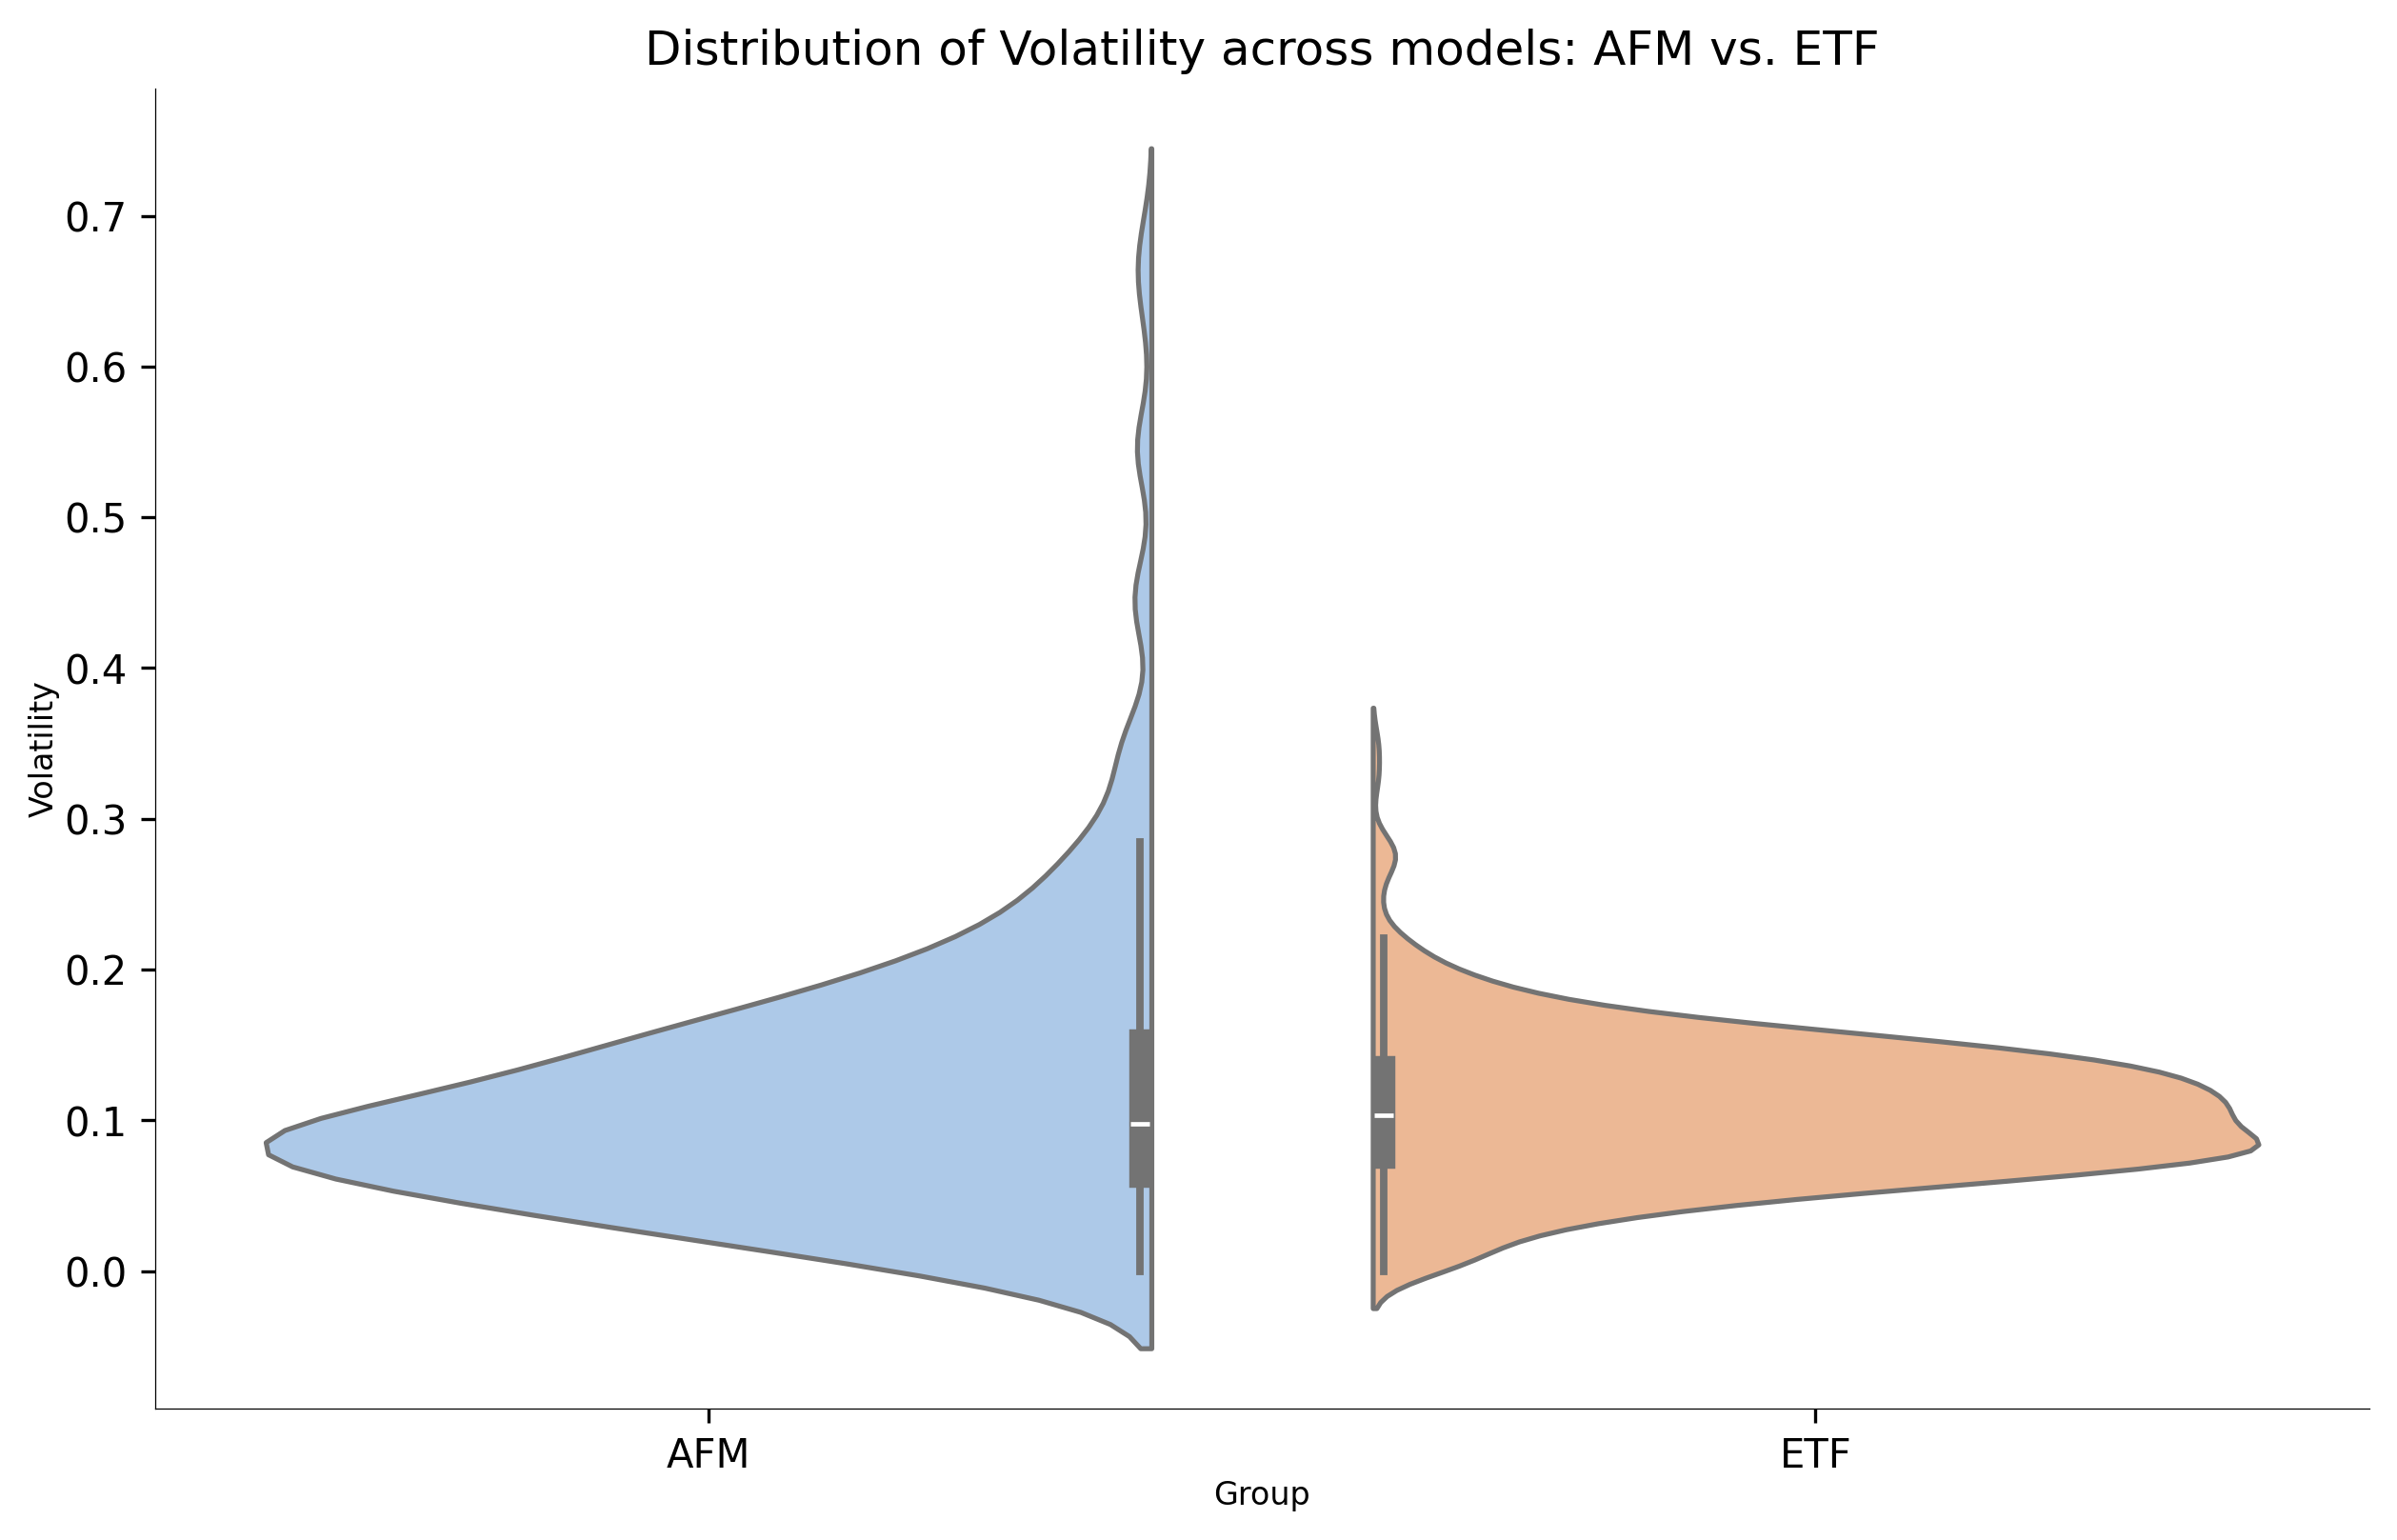

In [64]:
# Plotting the violin plot
plt.figure(figsize=(10, 6), dpi=300)
sns.violinplot(x='Group', y='Value', hue='Group', data=melted_df, split=True, palette="pastel", saturation=0.7)
plt.title('Distribution of Volatility across models: AFM vs. ETF')
plt.xlabel('Group', fontsize=8, labelpad=1)
plt.ylabel('Volatility', fontsize=8, labelpad=1)

# Adjust the border line (spine) width
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.3)  # Set spine (border) line width

# Remove specific borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.savefig('/Users/alina/Documents/PhD/AFM/figure/volatility_violin_02.pdf', dpi=300, bbox_inches='tight')

plt.show()


### Heat Map

In [38]:
v_heat = gVolatility.iloc[:,:9]
v_heat

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
0,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6
1,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75
2,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
3,0,0,0,0,0,0,0,0,0
4,0.093226154,0.126164102,0.100872463,0.196941476,0.238702088,0.241446917,0.258896187,0.343005588,0.312420351
...,...,...,...,...,...,...,...,...,...
749,0.149691207,0.146554259,0.23830997,0.008332516,0.436917949,0.299676502,0.413194785,0.03480051,0.327124792
750,0.212430154,0.019507891,0.300852858,0.196745417,0.188118812,0.098911871,0.22321341,0.283207529,0.194588766
751,0.071463582,0.096951279,0.258308009,0.370061759,0.383981963,0.09675522,0.098715812,0.086364082,0.191451818
752,0.078521714,0.018723655,0.108126654,0.548671699,0.350455838,0.093814332,0.23321243,0.26046466,0.475737673


In [39]:
# Remove the first two rows and reset the column names for easier access
data_cleaned = v_heat.drop([0, 1, 2]).reset_index(drop=True)
data_cleaned

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
0,0,0,0,0,0,0,0,0,0
1,0.093226154,0.126164102,0.100872463,0.196941476,0.238702088,0.241446917,0.258896187,0.343005588,0.312420351
2,0.154592687,0.006764043,0.184589746,0.341829232,0.092637977,0.406724831,0.038329576,0.618076659,0.202823253
3,0.206352318,0.100088227,0.126360161,0.216939516,0.150083325,0.415743555,0.309283404,0.678658955,0.195569062
4,0.231840016,0.007156161,0.139496128,0.171061661,0.080090187,0.154984805,0.559062837,0.240858739,0.465346535
...,...,...,...,...,...,...,...,...,...
746,0.149691207,0.146554259,0.23830997,0.008332516,0.436917949,0.299676502,0.413194785,0.03480051,0.327124792
747,0.212430154,0.019507891,0.300852858,0.196745417,0.188118812,0.098911871,0.22321341,0.283207529,0.194588766
748,0.071463582,0.096951279,0.258308009,0.370061759,0.383981963,0.09675522,0.098715812,0.086364082,0.191451818
749,0.078521714,0.018723655,0.108126654,0.548671699,0.350455838,0.093814332,0.23321243,0.26046466,0.475737673


In [40]:
# Rename columns to match the combinations (e.g., "0.2_0.25")
data_cleaned.columns = ['0.2_0.25', '0.2_0.5', '0.2_0.75', '0.4_0.25', '0.4_0.5', '0.4_0.75', '0.6_0.25', '0.6_0.5', '0.6_0.75']

# Convert all columns except 'time' to numeric, forcing errors to NaN (which we'll handle if they exist)
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# Display the cleaned data to confirm the structure
data_cleaned.head()

,0.2_0.25,0.2_0.5,0.2_0.75,0.4_0.25,0.4_0.5,0.4_0.75,0.6_0.25,0.6_0.5,0.6_0.75
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.093226,0.126164,0.100872,0.196941,0.238702,0.241447,0.258896,0.343006,0.312420
2,0.154593,0.006764,0.184590,0.341829,0.092638,0.406725,0.038330,0.618077,0.202823
3,0.206352,0.100088,0.126360,0.216940,0.150083,0.415744,0.309283,0.678659,0.195569
4,0.231840,0.007156,0.139496,0.171062,0.080090,0.154985,0.559063,0.240859,0.465347


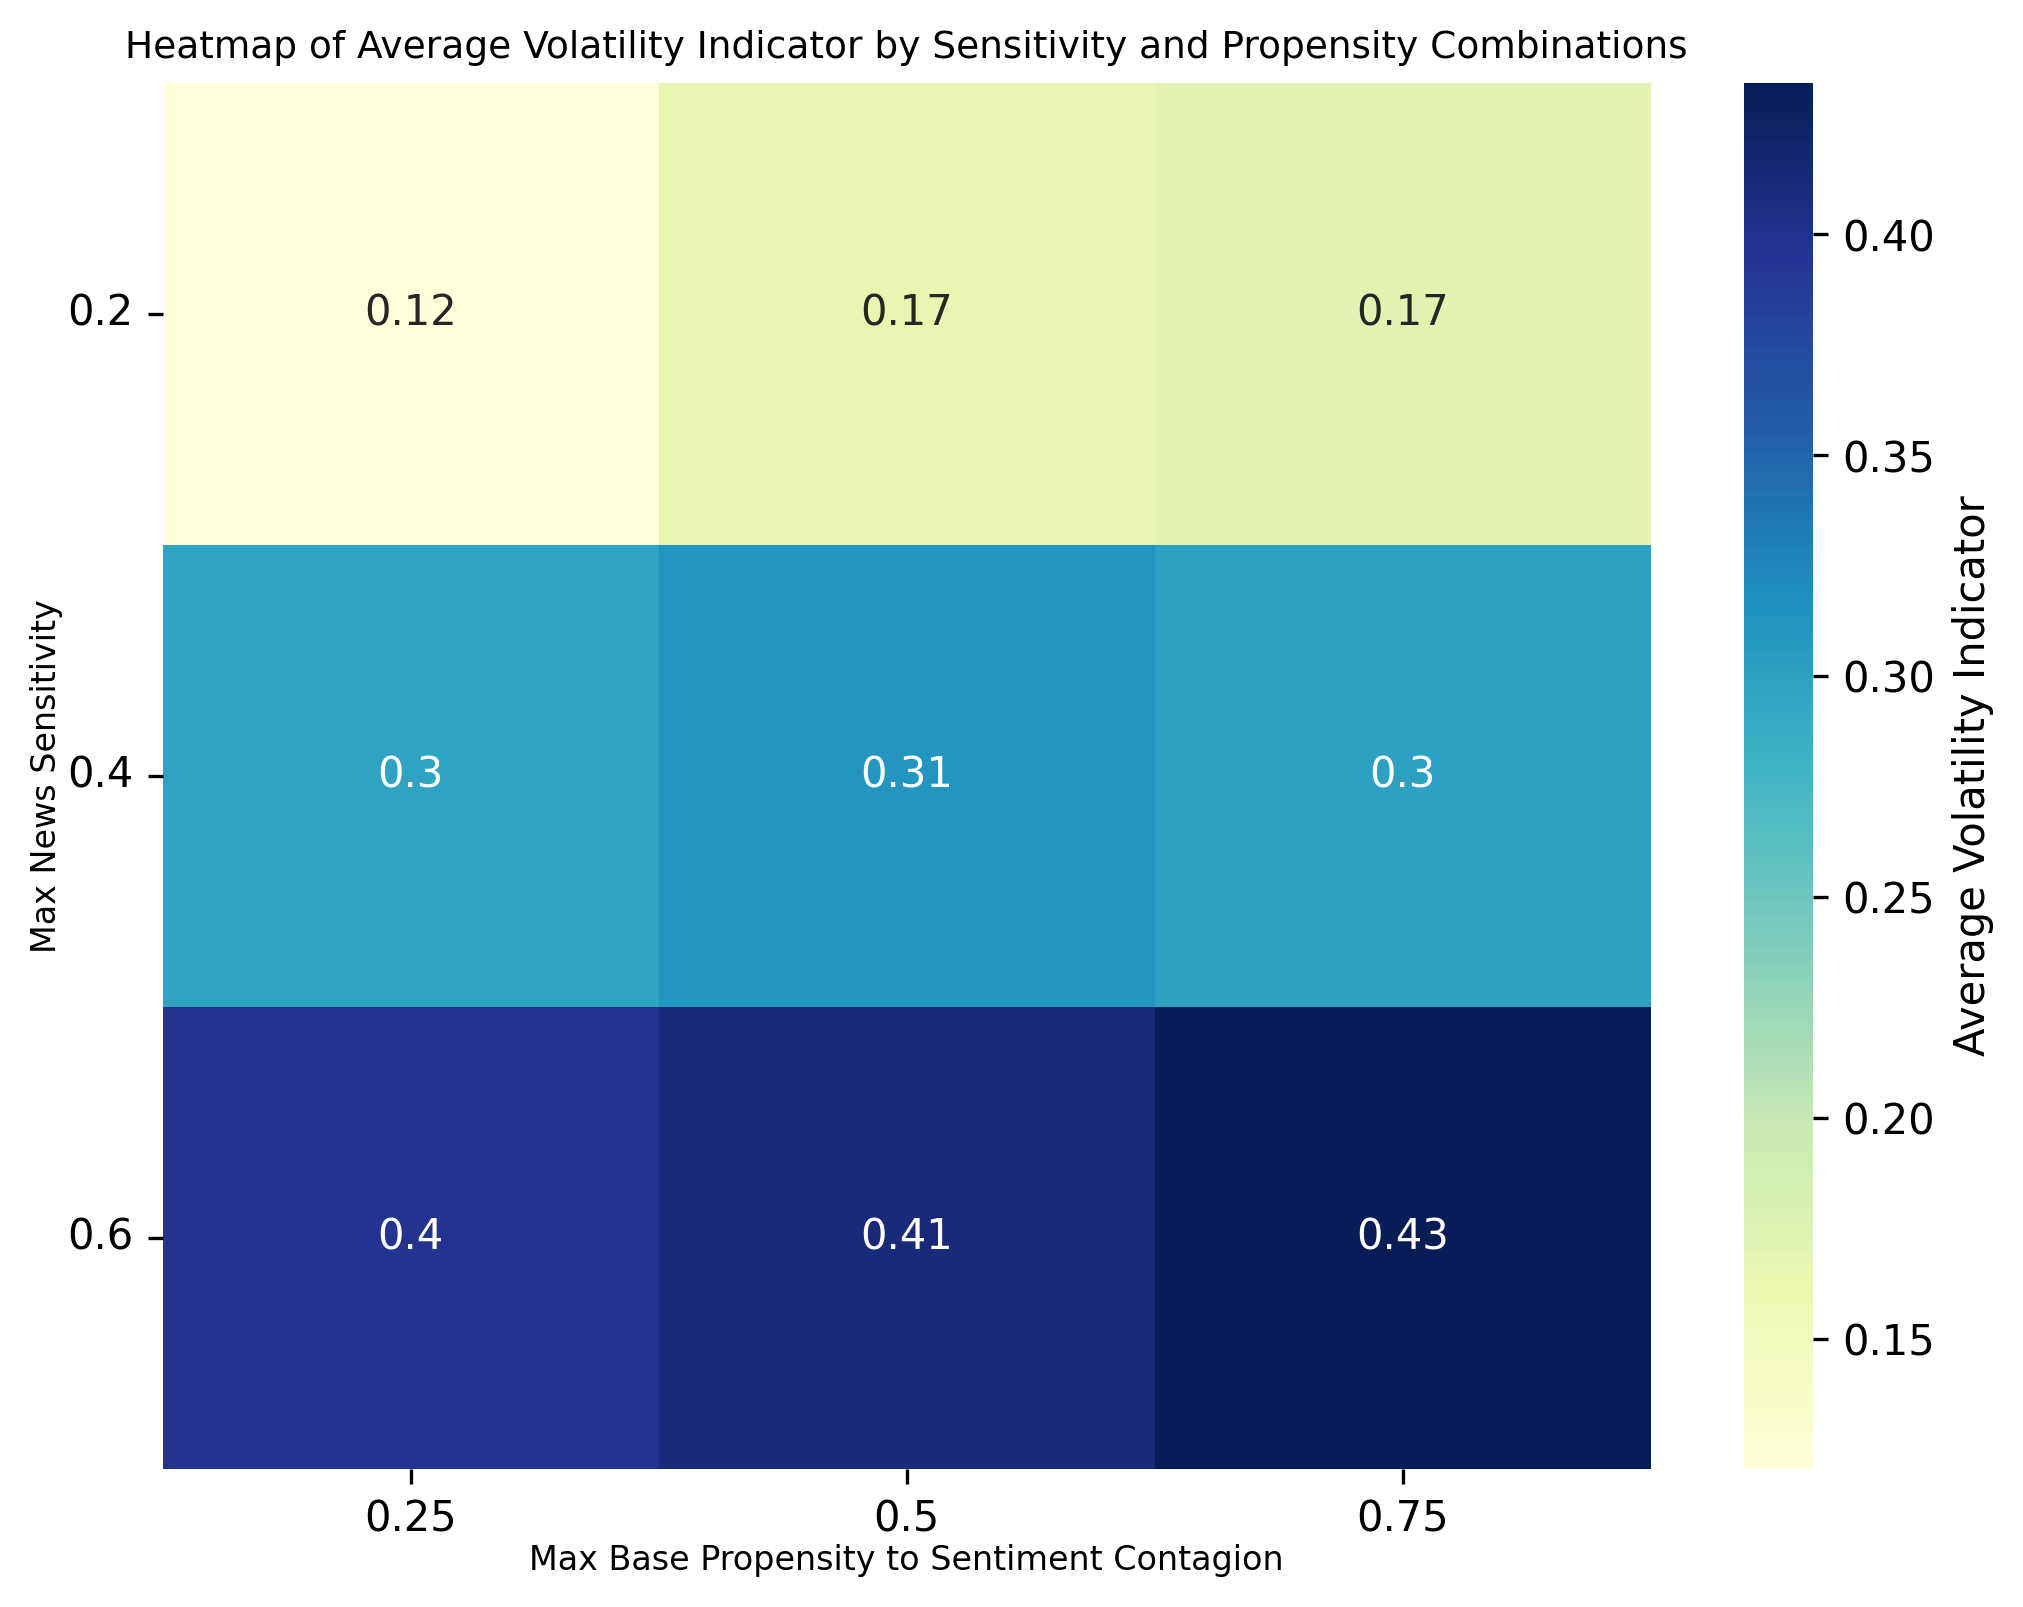

In [65]:
# Calculate the mean for each combination across 750 rows
summary_data = data_cleaned.mean().values.reshape(3, 3)

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(summary_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Average Volatility Indicator'})

# Set up labels based on the combinations
plt.xticks([0.5, 1.5, 2.5], [0.25, 0.5, 0.75])
plt.yticks([0.5, 1.5, 2.5], [0.2, 0.4, 0.6], rotation=0)
plt.xlabel("Max Base Propensity to Sentiment Contagion", fontsize=8, labelpad=1)
plt.ylabel("Max News Sensitivity",fontsize=8, labelpad=1)
plt.title("Heatmap of Average Volatility Indicator by Sensitivity and Propensity Combinations", fontsize=9)
#plt.savefig('/Users/alina/Documents/PhD/AFM/figure/gheat.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [43]:

e_heat = eVolatility.iloc[:,:9]
e_heat

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
0,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6
1,0.25,0.5,0.75,0.25,0.5,0.75,0.25,0.5,0.75
2,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
3,0,0,0,0,0,0,0,0,0
4,0.089501029,0.131849819,0.150083325,0.1910597,0.225370062,0.243603568,0.279482404,0.33261445,0.326340555
...,...,...,...,...,...,...,...,...,...
749,0.102440937,0.065385746,0.051465543,0.247720812,0.167728654,0.354573081,0.38966768,0.302029213,0.459464758
750,0.095186746,0.074992648,0.127536516,0.099696108,0.214586805,0.399078522,0.181648858,0.06695422,0.364572101
751,0.126360161,0.072247819,0.047348299,0.196941476,0.157533575,0.1910597,0.315949417,0.273796687,0.221448878
752,0.106166062,0.054210372,0.088520733,0.255955299,0.18851093,0.234388785,0.325556318,0.410253897,0.477698265


In [44]:
# Remove the first two rows and reset the column names for easier access
e_cleaned = e_heat.drop([0, 1, 2]).reset_index(drop=True)
e_cleaned  = e_cleaned.apply(pd.to_numeric, errors='coerce')

# Display the cleaned data to confirm the structure
e_cleaned.head()

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.089501,0.131850,0.150083,0.191060,0.225370,0.243604,0.279482,0.332614,0.326341
2,0.036565,0.203215,0.253603,0.368101,0.398490,0.156553,0.002647,0.184590,0.610430
3,0.112636,0.291834,0.364572,0.227919,0.364964,0.271248,0.265170,0.234585,0.657681
4,0.035389,0.246348,0.485345,0.107538,0.084600,0.195373,0.515538,0.041859,0.257916


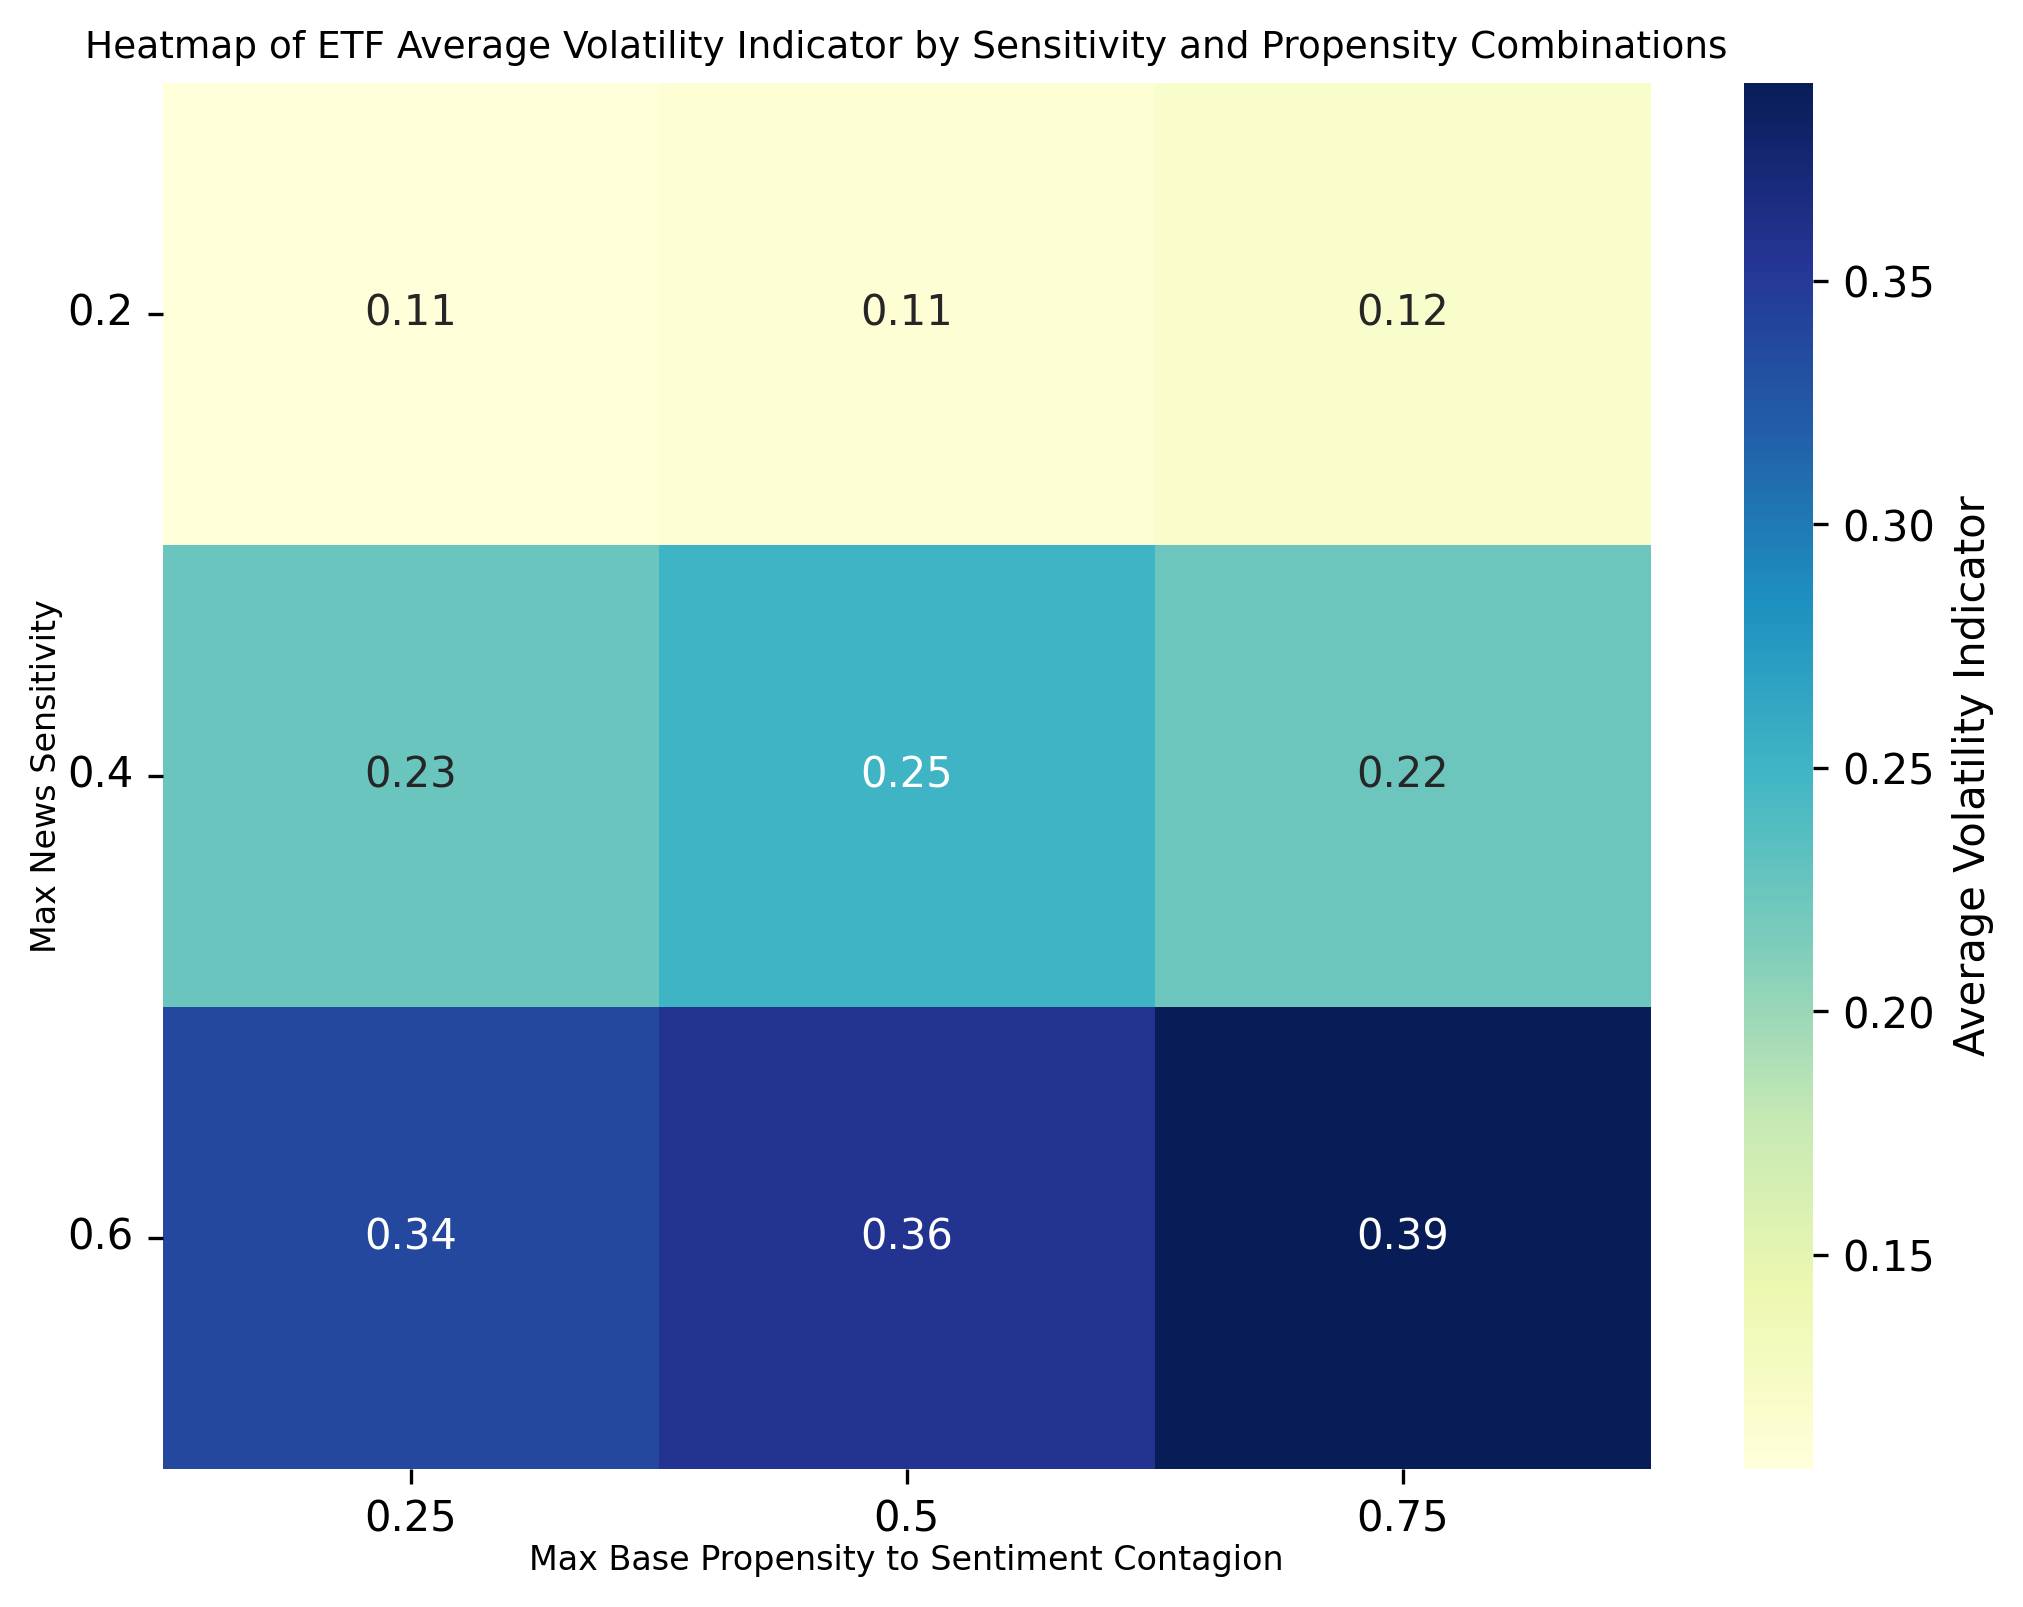

In [66]:
# Calculate the mean for each combination across 750 rows
e_summary = e_cleaned.mean().values.reshape(3, 3)

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(e_summary, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Average Volatility Indicator'})

# Set up labels based on the combinations
plt.xticks([0.5, 1.5, 2.5], [0.25, 0.5, 0.75])
plt.yticks([0.5, 1.5, 2.5], [0.2, 0.4, 0.6], rotation=0)
plt.xlabel("Max Base Propensity to Sentiment Contagion", fontsize=8, labelpad=1)
plt.ylabel("Max News Sensitivity",fontsize=8, labelpad=1)
plt.title("Heatmap of ETF Average Volatility Indicator by Sensitivity and Propensity Combinations", fontsize=9)
#plt.savefig('/Users/alina/Documents/PhD/AFM/figure/eheat.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# Returns of AFM
print(vkruskal_stat, vp_value)

# Returns of ETF
print(ekruskal_stat, ep_value)
# volatility of ETF
print(evkruskal_stat, evp_value)

# Mann-Whitney
print(ecorrected_p_values)

43.77632514119387 3.11954874810493e-10
19.474849328693544 5.903236740813165e-05
0.33549854835783055 0.8455658132921119
[1.00000000e+00 5.62673563e-05 4.45254694e-03]
